# Problem Statement

In [71]:
#Create a Iris Flower Prediction System to find the which type of flower ?

In [72]:
# import all library which can we use .

In [73]:
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

# Data Collection

In [74]:
# Gather data from sklearn library

In [75]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [76]:
# Find th column name
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [77]:
#create a DataFrame
df=pd.DataFrame(data.data,columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
# Change the columns name
df.rename({"sepal length (cm)":"sepal_length","sepal width (cm)":"sepal_width","petal length (cm)":"petal_length","petal width (cm)":"petal_width"},axis=1,inplace=True)

In [79]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
#get the target column on data (dependent variable)
df["target"]=data.target
#0:setosa ,1:versicolar ,2:virginica

In [81]:
# find the unique values of target column
df["target"].unique()

array([0, 1, 2])

# Explore Data 

In [82]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


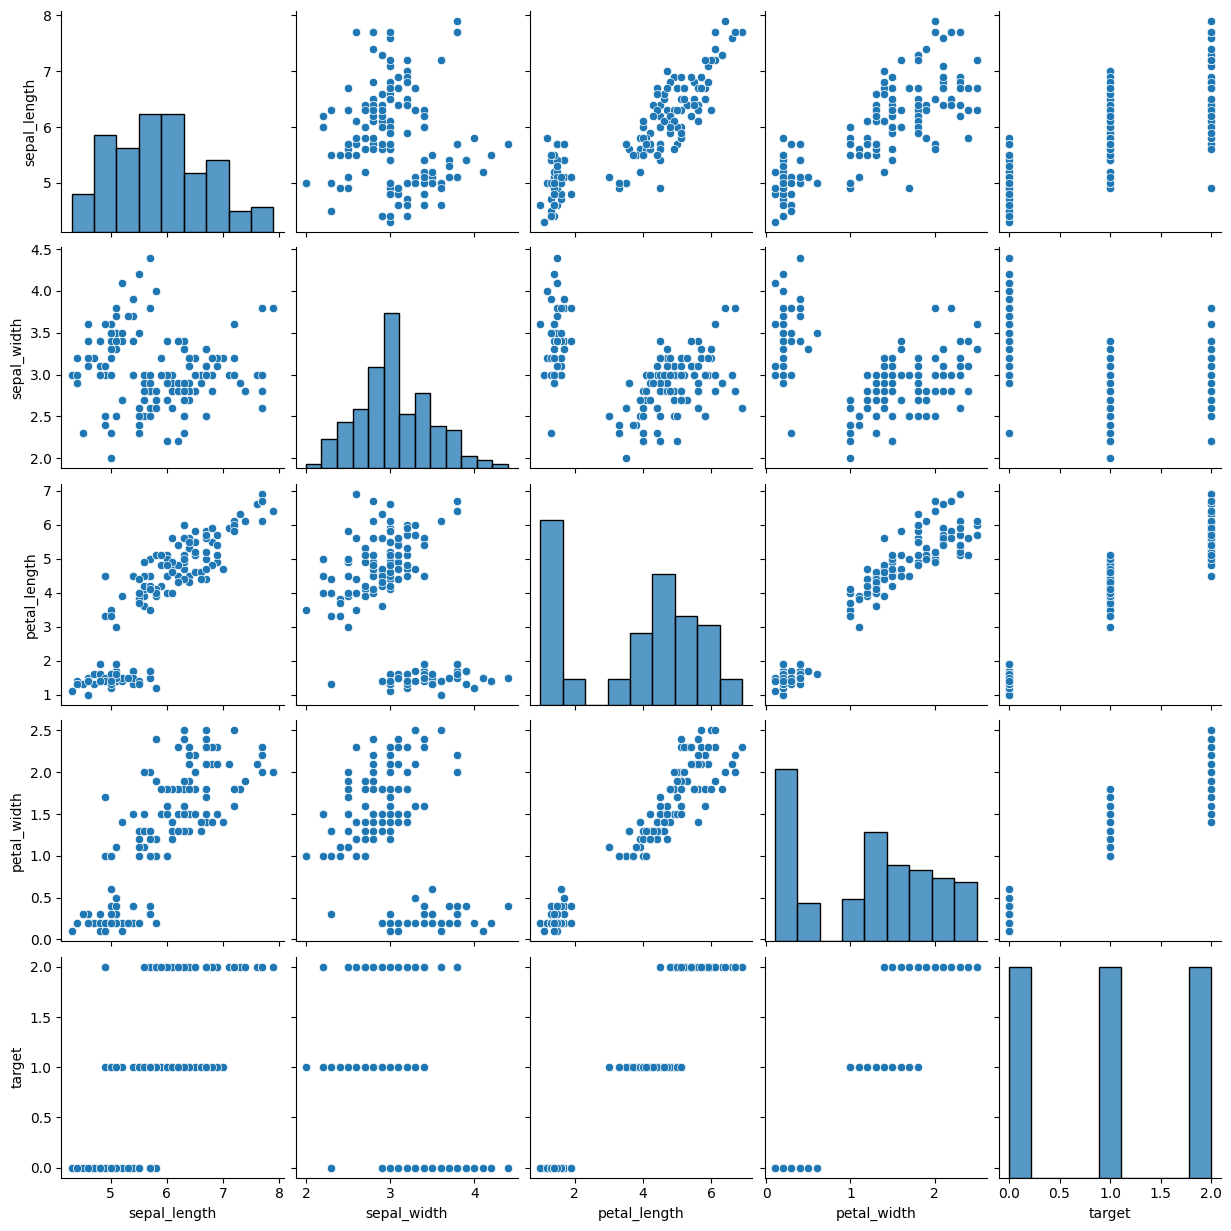

In [83]:
sns.pairplot(df)

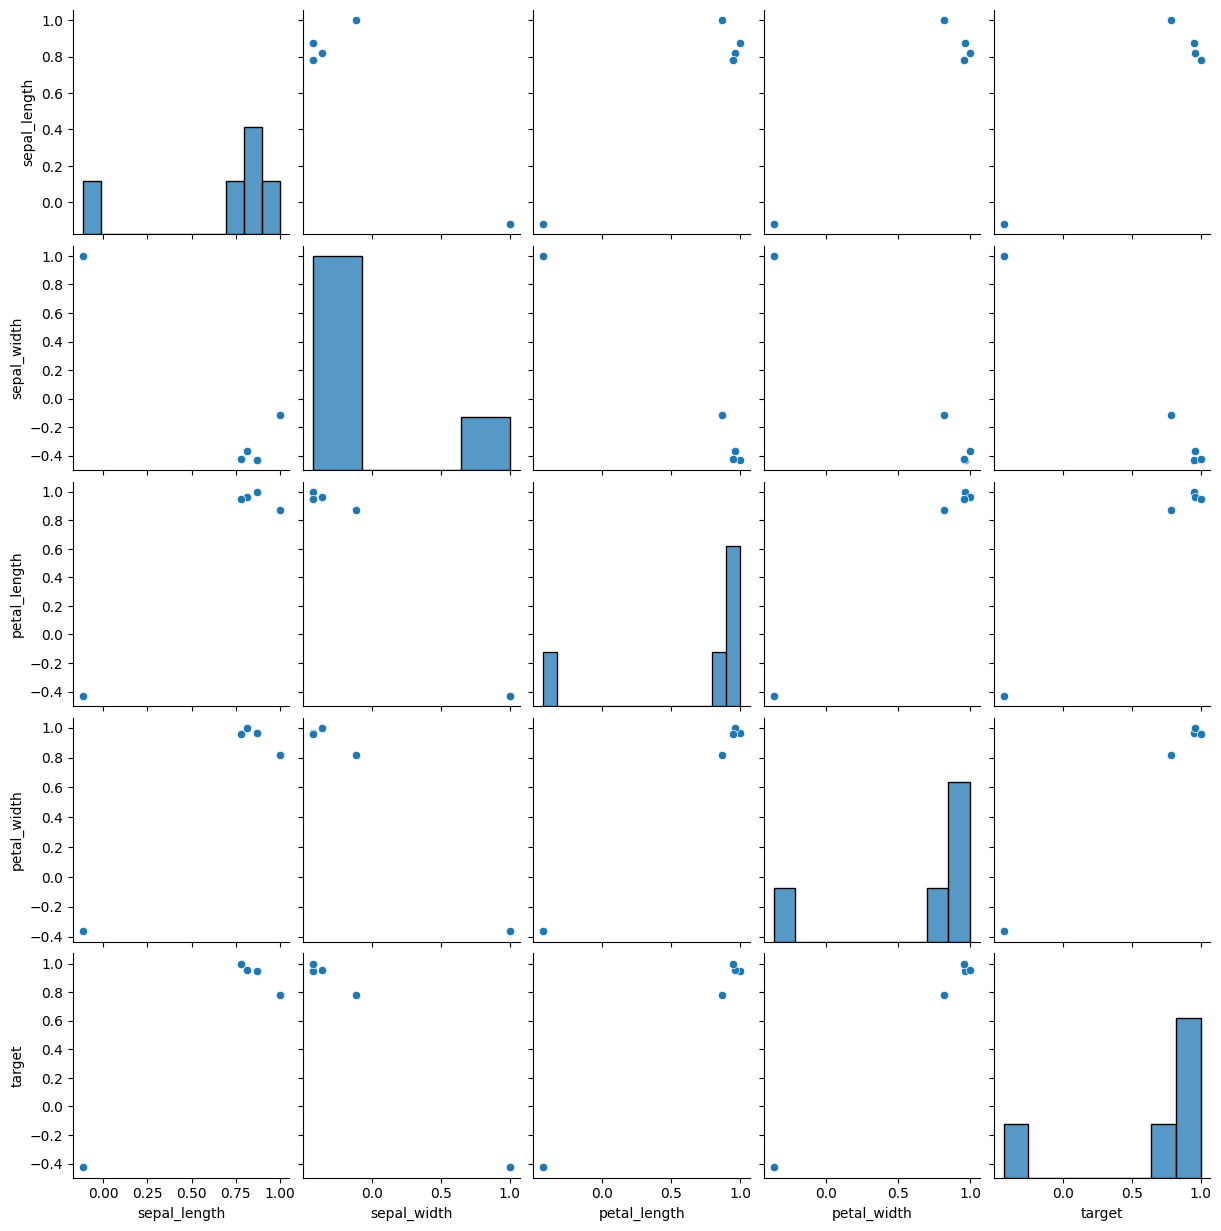

In [84]:
sns.pairplot(df.corr())

<Axes: >

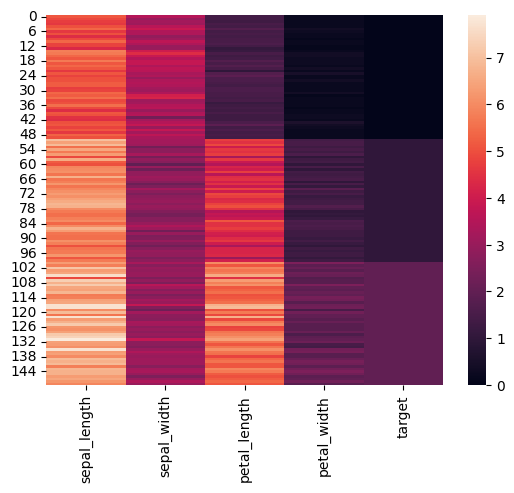

In [85]:
sns.heatmap(df)

<Axes: >

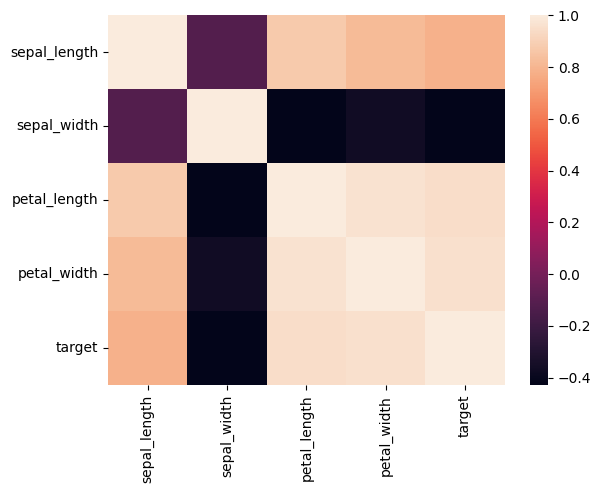

In [86]:
sns.heatmap(df.corr())


<Axes: xlabel='target', ylabel='count'>

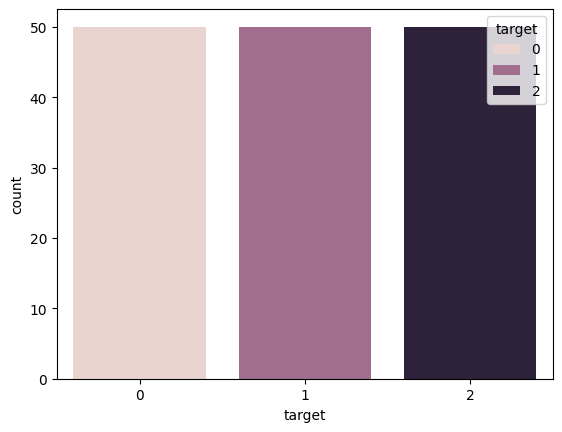

In [87]:
sns.countplot(x=df["target"],hue=df["target"])

<Axes: ylabel='Density'>

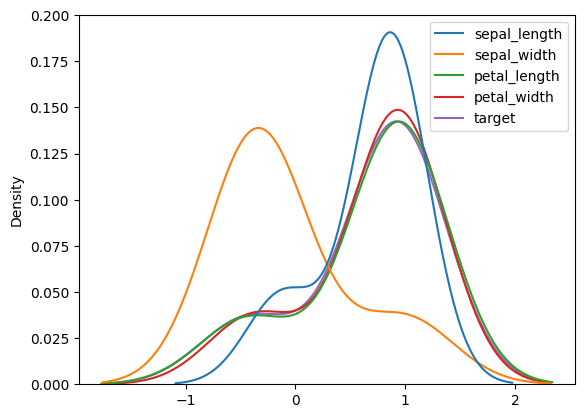

In [88]:
sns.kdeplot(df.corr())

<Axes: xlabel='target', ylabel='Density'>

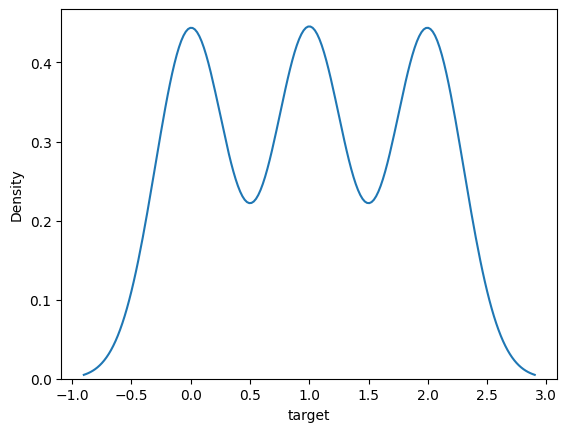

In [89]:
sns.kdeplot(df["target"])

<Axes: >

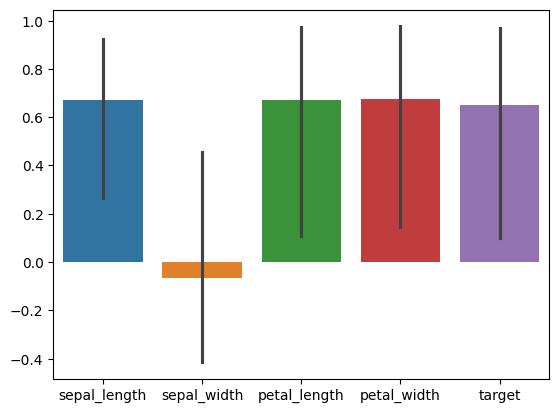

In [90]:
sns.barplot(df.corr())

<Axes: >

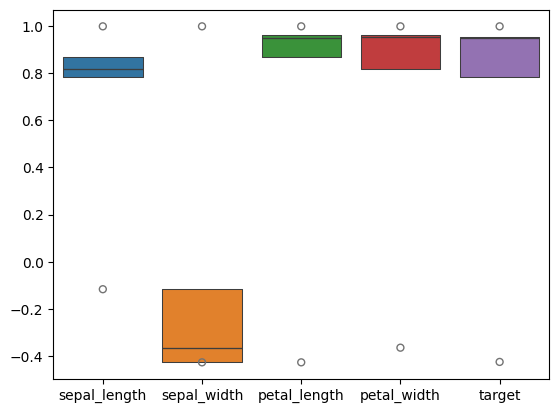

In [122]:
sns.boxenplot(df.corr())

<Axes: >

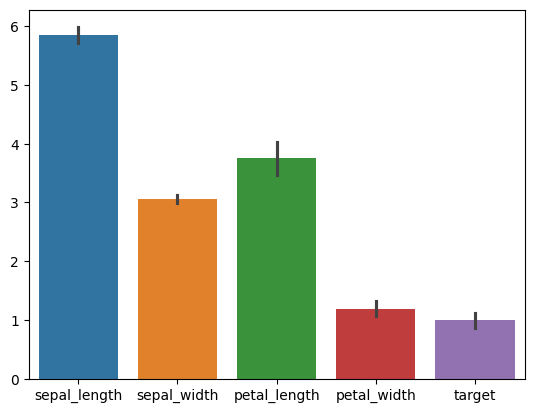

In [92]:
sns.barplot(df)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [94]:
df.shape

(150, 5)

In [95]:
df.notnull()

,sepal_length,sepal_width,petal_length,petal_width,target
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
145,True,True,True,True,True
146,True,True,True,True,True
147,True,True,True,True,True
148,True,True,True,True,True


In [96]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,target
116,6.5,3.0,5.5,1.8,2
136,6.3,3.4,5.6,2.4,2
70,5.9,3.2,4.8,1.8,1
73,6.1,2.8,4.7,1.2,1
51,6.4,3.2,4.5,1.5,1
89,5.5,2.5,4.0,1.3,1
124,6.7,3.3,5.7,2.1,2
140,6.7,3.1,5.6,2.4,2
112,6.8,3.0,5.5,2.1,2
6,4.6,3.4,1.4,0.3,0


# Feature Selection

In [97]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [99]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

# Model Training:

In [100]:
#model training using logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [101]:
y_pred=model.predict(x_train)

In [102]:
#model evaluatioin on x_train
cnf=confusion_matrix(y_train,y_pred)
print("confusion matrics :\n",cnf)

ac=accuracy_score(y_train,y_pred)
print("accuracy score :\n",ac)

clf=classification_report(y_train,y_pred)
print("classification report :\n",clf)

confusion matrics :
 [[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
accuracy score :
 0.9666666666666667
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [103]:
y_pred_t=model.predict(x_test)

In [104]:
#model evaluatioin on y_test
cnf=confusion_matrix(y_test,y_pred_t)
print("confusion matrics :\n",cnf)

ac=accuracy_score(y_test,y_pred_t)
print("accuracy score :\n",ac)

clf=classification_report(y_test,y_pred_t)
print("classification report :\n",clf)

confusion matrics :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy score :
 1.0
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [105]:
# model is already working is best,but i write below code usndersatanding purpose how to improve accuracy/overfitting/underfitting .

In [106]:
alg=LogisticRegression()

hyperparameter={
    "C":np.arange(0.1,1.0),
    "intercept_scaling":np.arange(1,10),
    "verbose":np.arange(0,10)
}


    

In [107]:
model=GridSearchCV(alg,hyperparameter)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.1]),
                         'intercept_scaling': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'verbose': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

# Model Evaluation After improve our model

In [108]:
y_pred=model.predict(x_train)

In [109]:
#model evaluatioin on x_train
cnf=confusion_matrix(y_train,y_pred)
print("confusion matrics :\n",cnf)

ac=accuracy_score(y_train,y_pred)
print("accuracy score :\n",ac)

clf=classification_report(y_train,y_pred)
print("classification report :\n",clf)

confusion matrics :
 [[40  0  0]
 [ 0 35  6]
 [ 0  4 35]]
accuracy score :
 0.9166666666666666
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.90      0.85      0.88        41
           2       0.85      0.90      0.88        39

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



In [110]:
y_pred_t=model.predict(x_test)

In [111]:
#model evaluatioin on x_train
cnf=confusion_matrix(y_test,y_pred_t)
print("confusion matrics :\n",cnf)

ac=accuracy_score(y_test,y_pred_t)
print("accuracy score :\n",ac)

clf=classification_report(y_test,y_pred_t)
print("classification report :\n",clf)

confusion matrics :
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
accuracy score :
 0.9666666666666667
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Load model in Pickle file

In [112]:
import pickle
with open("iris_model.pkl","wb") as f:
    pickle.dump(model,f)

# we use/check/trial Iris Flower Prediction system 

In [113]:
#we can check us iris flower prediction system is working on good or not

In [114]:
with open("iris_model.pkl","rb") as f:
    model=pickle.load(f)

In [115]:
test_data=np.zeros(len(x.columns))
test_data

array([0., 0., 0., 0.])

In [116]:
sepal_length=5.5
sepal_width=2.5	
petal_length=4.0
petal_width=1.3

In [117]:
test_data[0]=sepal_length
test_data[1]=sepal_width
test_data[2]=petal_length
test_data[3]=petal_width

In [118]:
a=model.predict([test_data])
a

array([2])

In [119]:
if a==0:
    print("setosa")
elif a==1:
    print("versicolor")
else:
    print("virginica")

virginica
